In [2]:
import pandas as pd 
import numpy as np

In [3]:
filepath = '../final_dataset.csv'
df = pd.read_csv(filepath)
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df.head()

,Date,S&P500_Adj_Close,S&P500_Close,S&P500_High,S&P500_Low,S&P500_Open,S&P500_Volume,VIX_Daily_Returns,VIX_Adj_Close,VIX_Close,...,VIX_Open,VIX_Volume,VIX_Daily_Returns.1,USD_EUR_Exchange_Rate,Effective_Federal_Funds_Rate,US_Dollar_Index,CPI_All_Items,Consumer_Sentiment_Index,Unemployment_Rate,GDP
0,2000-07-03,1469.540039,1469.540039,1469.579956,1450.849976,1454.599976,4.519000e+08,0.010271,19.830000,19.830000,...,20.510000,0.0,0.014841,0.9526,7.03,107.059998,0.232019,102.5935,4.0,10318.165
1,2000-07-05,1446.229980,1446.229980,1469.540039,1442.449951,1469.540039,1.019300e+09,-0.015862,21.160000,21.160000,...,20.629999,0.0,0.067070,0.9548,6.52,107.120003,0.232019,102.5935,4.0,10318.165
2,2000-07-06,1456.670044,1456.670044,1461.650024,1439.560059,1446.229980,9.473000e+08,0.007219,20.940001,20.940001,...,20.770000,0.0,-0.010397,0.9527,6.51,107.370003,0.232019,102.5935,4.0,10318.165
3,2000-07-07,1478.900024,1478.900024,1484.119995,1456.670044,1456.670044,9.317000e+08,0.015261,19.219999,19.219999,...,19.680000,0.0,-0.082140,0.9484,6.42,107.650002,0.232019,102.5935,4.0,10318.165
4,2000-07-10,1475.619995,1475.619995,1486.560059,1474.760010,1478.900024,8.387000e+08,-0.002218,20.330000,20.330000,...,20.200001,0.0,0.057752,0.9521,6.51,107.010002,0.232019,102.5935,4.0,10318.165


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
aggregation_rules = {
    'S&P500_Adj_Close': 'mean',
    'S&P500_Close': 'mean',
    'S&P500_High': 'mean',
    'S&P500_Low': 'mean',
    'S&P500_Open': 'mean',
    'S&P500_Volume': 'sum',
    'VIX_Daily_Returns': 'mean', 
    'VIX_Adj_Close': 'mean',
    'VIX_Close': 'mean',
    'VIX_High': 'mean',
    'VIX_Low': 'mean',
    'VIX_Open': 'mean',
    'VIX_Volume': 'sum',
    'VIX_Daily_Returns.1': 'mean',
    'USD_EUR_Exchange_Rate': 'mean',
    'Effective_Federal_Funds_Rate': 'mean',
    'US_Dollar_Index': 'mean',
    'CPI_All_Items': 'mean',
    'Consumer_Sentiment_Index': 'mean',
    'Unemployment_Rate': 'mean',
    'GDP': 'mean',  # GDP should already be quarterly, so this will ensure no data is lost
}

In [6]:
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Attempt to convert non-numeric columns to numeric, coercing errors to NaN
for column in non_numeric_columns:
    if column == 'Date':
        continue
    print(f'Converting {column} to numeric')
    df[column] = pd.to_numeric(df[column], errors='coerce')

# forward fill the NaN values
df.fillna(method='ffill', inplace=True)

Converting USD_EUR_Exchange_Rate to numeric
Converting Effective_Federal_Funds_Rate to numeric


C:\Users\Alli Ajagbe\AppData\Local\Temp\ipykernel_22448\3836609432.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
quarterly_data = df.resample('QE').agg(aggregation_rules)

In [8]:
len(quarterly_data)

94

In [9]:
quarterly_data

,S&P500_Adj_Close,S&P500_Close,S&P500_High,S&P500_Low,S&P500_Open,S&P500_Volume,VIX_Daily_Returns,VIX_Adj_Close,VIX_Close,VIX_High,...,VIX_Open,VIX_Volume,VIX_Daily_Returns.1,USD_EUR_Exchange_Rate,Effective_Federal_Funds_Rate,US_Dollar_Index,CPI_All_Items,Consumer_Sentiment_Index,Unemployment_Rate,GDP
Date,,,,,,,,,,,,,,,,,,,,,
2000-09-30,1475.978888,1475.978888,1485.611268,1467.169687,1476.266030,6.029110e+10,-0.000161,19.169048,19.169048,19.620159,...,19.222063,0.0,0.001583,0.904213,6.511429,111.278413,0.239001,102.554170,4.004762,10318.165
2000-12-31,1366.310312,1366.310312,1381.009047,1353.282070,1368.190949,7.009450e+10,-0.001227,26.016667,26.016667,26.799206,...,26.036508,0.0,0.006052,0.868186,6.498571,115.111270,0.061235,102.070835,3.900000,10435.744
2001-03-31,1273.329039,1273.329039,1285.768391,1260.875803,1275.914846,7.728081e+10,-0.001965,25.726452,25.726452,26.676290,...,25.996774,0.0,0.002439,0.921958,5.611613,111.991774,0.417374,100.791976,4.235484,10470.231
2001-06-30,1234.250314,1234.250314,1243.688573,1222.726347,1233.284598,7.468392e+10,0.000943,23.923810,23.923810,24.667143,...,24.219524,0.0,-0.005153,0.873383,4.320000,117.090317,0.340317,100.633678,4.398413,10599.000
2001-09-30,1153.706613,1153.706613,1164.702715,1144.440006,1156.816783,7.217820e+10,-0.002646,25.380339,25.380339,26.297797,...,25.523898,0.0,0.010966,0.889710,3.495593,115.527119,0.014605,100.335553,4.818644,10598.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,3851.973501,3851.973501,3883.685074,3817.123322,3849.681745,2.737450e+11,0.001208,25.075397,25.075397,26.239206,...,25.573016,0.0,-0.004985,1.021051,3.643492,108.194762,-0.000787,96.903893,3.566667,26734.277
2023-03-31,4000.064528,4000.064528,4025.099361,3968.538700,3994.812437,2.742509e+11,0.001151,20.694516,20.694516,22.076290,...,21.001290,0.0,-0.000513,1.072971,4.521935,103.394032,0.551797,97.389122,3.498387,27164.359
2023-06-30,4206.072900,4206.072900,4221.982914,4183.719699,4201.399828,2.477736e+11,0.001314,16.461129,16.461129,17.342903,...,16.774516,0.0,-0.003766,1.088789,4.989839,102.552741,0.353765,97.365463,3.574194,27453.815


In [10]:
# save the data
quarterly_data.to_csv('../final_dataset_quarterly.csv')
print('Data saved to final_dataset_quarterly.csv')

Data saved to final_dataset_quarterly.csv


In [11]:
quarterly_data.columns

Index(['S&P500_Adj_Close', 'S&P500_Close', 'S&P500_High', 'S&P500_Low',
       'S&P500_Open', 'S&P500_Volume', 'VIX_Daily_Returns', 'VIX_Adj_Close',
       'VIX_Close', 'VIX_High', 'VIX_Low', 'VIX_Open', 'VIX_Volume',
       'VIX_Daily_Returns.1', 'USD_EUR_Exchange_Rate',
       'Effective_Federal_Funds_Rate', 'US_Dollar_Index', 'CPI_All_Items',
       'Consumer_Sentiment_Index', 'Unemployment_Rate', 'GDP'],
      dtype='object')

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, grangercausalitytests, coint
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import warnings

warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("../final_dataset_quarterly.csv", parse_dates=["Date"], index_col="Date")

# 1. EDA
print("Data Summary:")
df.describe()

Data Summary:


,S&P500_Adj_Close,S&P500_Close,S&P500_High,S&P500_Low,S&P500_Open,S&P500_Volume,VIX_Daily_Returns,VIX_Adj_Close,VIX_Close,VIX_High,...,VIX_Open,VIX_Volume,VIX_Daily_Returns.1,USD_EUR_Exchange_Rate,Effective_Federal_Funds_Rate,US_Dollar_Index,CPI_All_Items,Consumer_Sentiment_Index,Unemployment_Rate,GDP
count,94.000000,94.000000,94.000000,94.000000,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.0,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,1984.823453,1984.823453,1996.148144,1972.072357,1984.533872,2.122213e+11,0.000273,19.966314,19.966314,21.004077,...,20.113918,0.0,0.002493,1.198503,1.698351,91.771627,0.205766,99.633690,5.801125,17021.829745
std,1072.314500,1072.314500,1077.762969,1066.131093,1072.041772,8.327838e+10,0.001304,7.670151,7.670151,8.130963,...,7.733152,0.0,0.006402,0.155135,1.873415,11.229049,0.329598,1.470397,1.968183,4691.690086
min,807.665901,807.665901,820.841145,794.834589,808.660491,6.029110e+10,-0.003101,10.307937,10.307937,10.857619,...,10.276508,0.0,-0.008104,0.868186,0.058889,72.726562,-1.287141,96.450752,3.498387,10318.165000
25%,1195.107306,1195.107306,1200.428518,1189.717909,1195.080870,1.475001e+11,-0.000324,14.341948,14.341948,14.980325,...,14.432625,0.0,-0.001111,1.102470,0.138833,82.246813,0.008248,98.530461,4.373413,13782.615000
50%,1482.721191,1482.721191,1492.646348,1472.560874,1482.654839,2.245728e+11,0.000448,18.102016,18.102016,19.229444,...,18.224577,0.0,0.000868,1.192403,1.014274,91.012000,0.207134,99.867265,5.311603,16137.960000
75%,2675.014450,2675.014450,2688.870691,2656.405753,2678.455275,2.609809e+11,0.001142,24.619336,24.619336,25.893203,...,24.878242,0.0,0.005479,1.311273,2.400269,97.947812,0.403799,100.876177,6.717175,20011.677000
max,4602.108894,4602.108894,4623.372498,4576.220802,4597.917496,3.984265e+11,0.003090,58.595937,58.595937,62.623438,...,58.845156,0.0,0.031132,1.562520,6.511429,118.207167,1.046643,102.554170,12.965079,28296.967000


In [14]:
df['Log_GDP'] = np.log(df['GDP'])
df['S&P500_Daily_Returns'] = df['S&P500_Adj_Close'].pct_change()

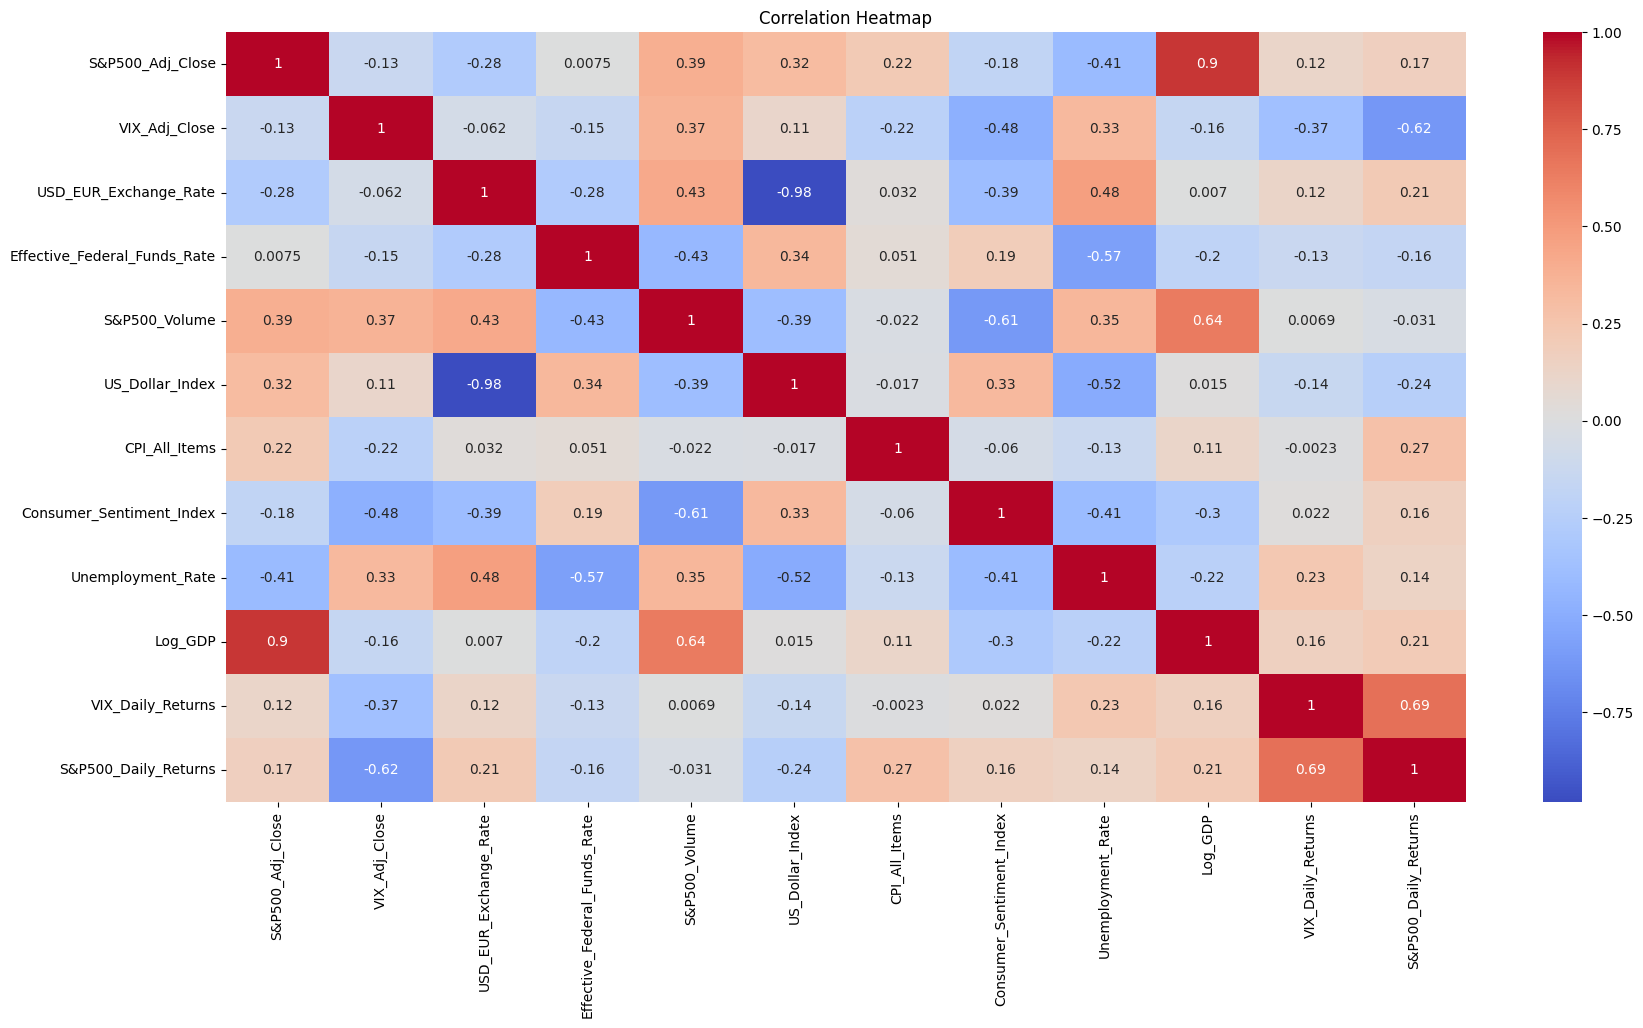

In [15]:
# Correlation heatmap
columns_to_select = ['S&P500_Adj_Close', 'VIX_Adj_Close', 'USD_EUR_Exchange_Rate', 
                   'Effective_Federal_Funds_Rate', 'S&P500_Volume', 'US_Dollar_Index', 
                   'CPI_All_Items', 'Consumer_Sentiment_Index', 'Unemployment_Rate', 
                   'Log_GDP', 'VIX_Daily_Returns', 'S&P500_Daily_Returns']
plt.figure(figsize=(20, 10))
sns.heatmap(df[columns_to_select].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

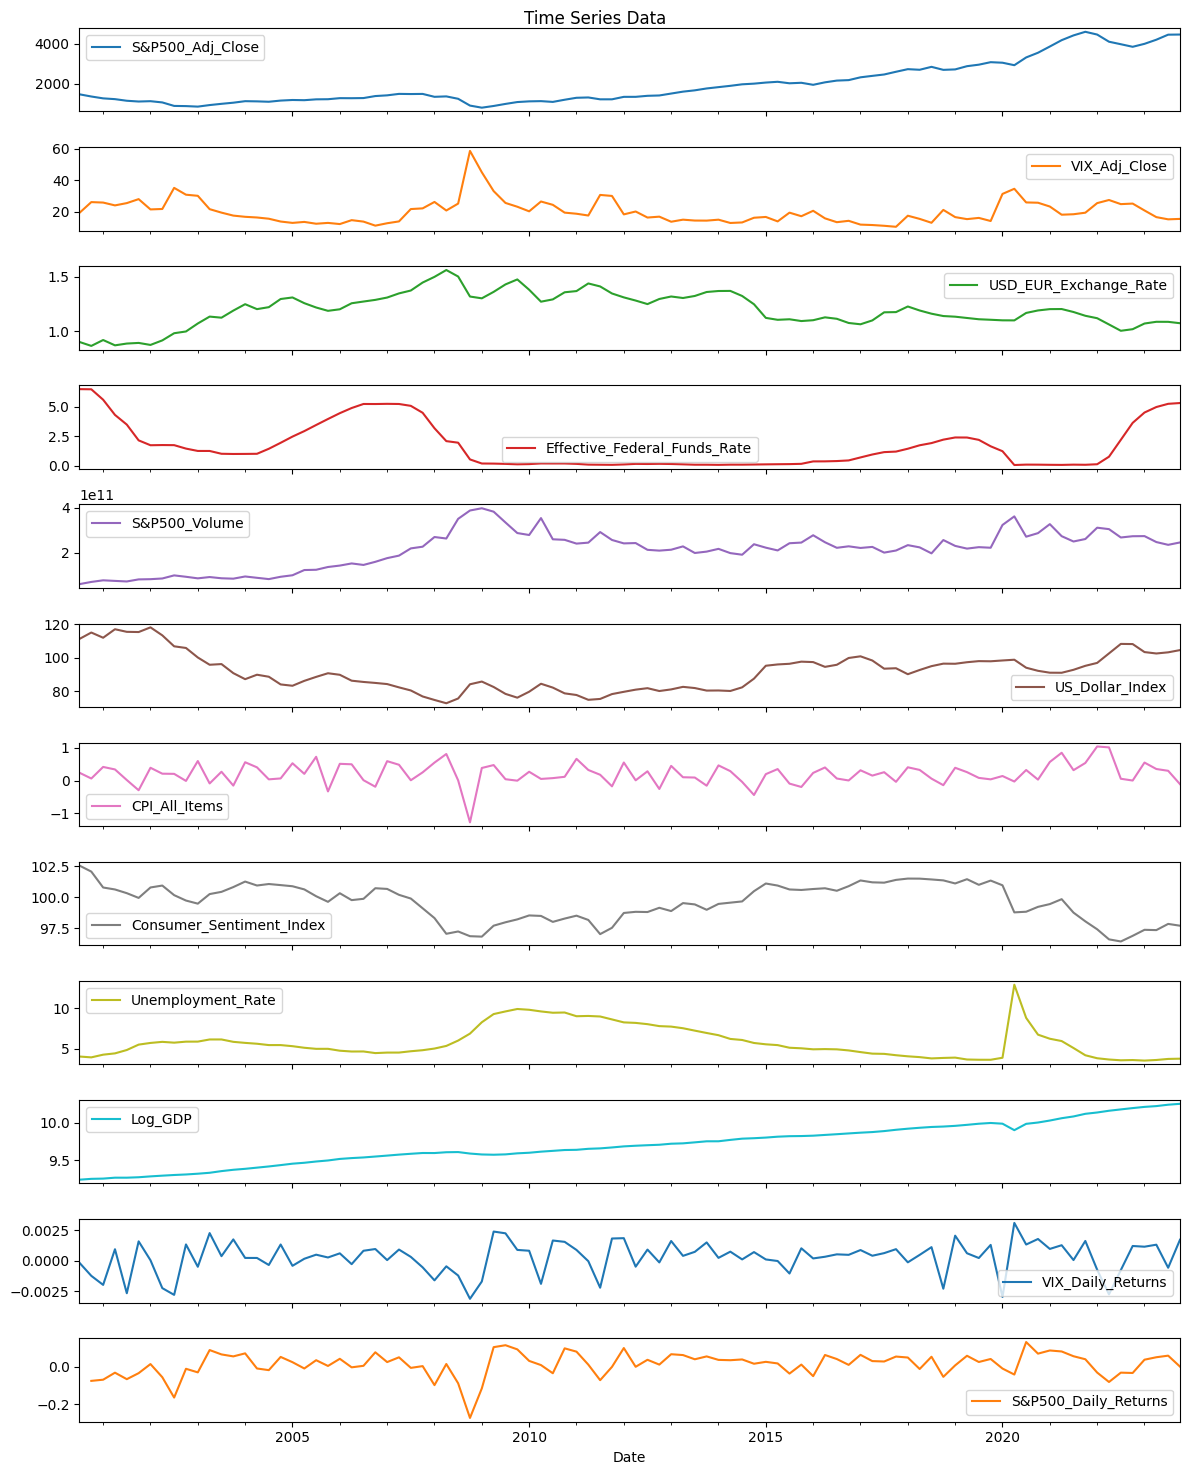

In [16]:
# Time series plots
df[columns_to_select].plot(subplots=True, figsize=(12, 15), title="Time Series Data")
plt.tight_layout()
plt.show()

In [17]:
# 2. Stationarity check
def test_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f"ADF Test for {name}:")
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print(f"{name} is stationary.\n")
    else:
        print(f"{name} is not stationary. Differencing recommended.\n")

In [18]:
# Test stationarity for all columns
for column in columns_to_select:
    test_stationarity(df[column], column)

ADF Test for S&P500_Adj_Close:
Test Statistic: 1.2978861290135857
p-value: 0.9965970739742259
S&P500_Adj_Close is not stationary. Differencing recommended.

ADF Test for VIX_Adj_Close:
Test Statistic: -3.950908610457542
p-value: 0.0016905460474772014
VIX_Adj_Close is stationary.

ADF Test for USD_EUR_Exchange_Rate:
Test Statistic: -2.214902149550946
p-value: 0.20088136207577145
USD_EUR_Exchange_Rate is not stationary. Differencing recommended.

ADF Test for Effective_Federal_Funds_Rate:
Test Statistic: -3.2847579736738868
p-value: 0.015573693732314936
Effective_Federal_Funds_Rate is stationary.

ADF Test for S&P500_Volume:
Test Statistic: -2.231991176520609
p-value: 0.19484001734000256
S&P500_Volume is not stationary. Differencing recommended.

ADF Test for US_Dollar_Index:
Test Statistic: -1.8282815599742883
p-value: 0.36651380822972995
US_Dollar_Index is not stationary. Differencing recommended.

ADF Test for CPI_All_Items:
Test Statistic: -1.748405089134134
p-value: 0.40636092837177

In [19]:
# Differencing for stationarity
df_diff = df.diff().dropna()
for column in columns_to_select:
    test_stationarity(df_diff[column], column)

ADF Test for S&P500_Adj_Close:
Test Statistic: -5.418735077056917
p-value: 3.0934392584698528e-06
S&P500_Adj_Close is stationary.

ADF Test for VIX_Adj_Close:
Test Statistic: -6.677158792334924
p-value: 4.4353584613713245e-09
VIX_Adj_Close is stationary.

ADF Test for USD_EUR_Exchange_Rate:
Test Statistic: -3.7726427972129883
p-value: 0.0031999498600247026
USD_EUR_Exchange_Rate is stationary.

ADF Test for Effective_Federal_Funds_Rate:
Test Statistic: -3.968547840446588
p-value: 0.0015844606251661337
Effective_Federal_Funds_Rate is stationary.

ADF Test for S&P500_Volume:
Test Statistic: -8.688918295230598
p-value: 4.09089711601194e-14
S&P500_Volume is stationary.

ADF Test for US_Dollar_Index:
Test Statistic: -6.762220596318513
p-value: 2.7736657474460574e-09
US_Dollar_Index is stationary.

ADF Test for CPI_All_Items:
Test Statistic: -5.327624282826183
p-value: 4.79847259438438e-06
CPI_All_Items is stationary.

ADF Test for Consumer_Sentiment_Index:
Test Statistic: -5.703221115685165


In [20]:
df_diff = df_diff[columns_to_select]

# 3. Volatility modeling (ARCH/GARCH)
sp500_returns = df_diff["S&P500_Daily_Returns"]
model = arch_model(sp500_returns, vol="Garch", p=1, q=1)
arch_fit = model.fit()
arch_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 136608.70940141147
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1763.350475866455
Iteration:      3,   Func. Count:     22,   Neg. LLF: -95.55925677059157
Iteration:      4,   Func. Count:     29,   Neg. LLF: -124.73907520285715
Iteration:      5,   Func. Count:     35,   Neg. LLF: -120.24342785410447
Iteration:      6,   Func. Count:     41,   Neg. LLF: -124.49758095670303
Iteration:      7,   Func. Count:     47,   Neg. LLF: -121.18818862300303
Iteration:      8,   Func. Count:     54,   Neg. LLF: -125.32411244320214
Iteration:      9,   Func. Count:     59,   Neg. LLF: -125.32466405053462
Iteration:     10,   Func. Count:     64,   Neg. LLF: -125.32466888508088
Iteration:     11,   Func. Count:     68,   Neg. LLF: -125.32466888507855
Optimization terminated successfully    (Exit mode 0)
            Current function value: -125.32466888508088
            Iterations: 11
            Function evaluations: 68
            Grad

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - GARCH Model Results                       
================================================================================
Dep. Variable:     S&P500_Daily_Returns   R-squared:                       0.000
Mean Model:               Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GARCH   Log-Likelihood:                125.325
Distribution:                    Normal   AIC:                          -242.649
Method:              Maximum Likelihood   BIC:                          -232.562
                                          No. Observations:                   92
Date:                  Wed, Dec 11 2024   Df Residuals:                       91
Time:                          19:58:00   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.8156e-03  5.028e-03      0.361      0.718 [-8.039e-03,1.167e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.7465e-03  6.749e-04      2.588  9.658e-03 [4.237e-04,3.069e-03]
alpha[1]       0.4452      0.159      2.808  4.984e-03     [  0.134,  0.756]
beta[1]        0.1843      0.140      1.318      0.187  [-8.970e-02,  0.458]
============================================================================

Covariance estimator: robust
"""

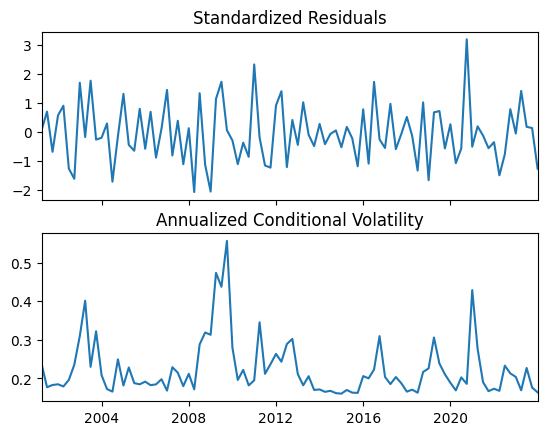

In [21]:
# Plot volatility
arch_fit.plot(annualize="M")
plt.show()

In [22]:
# 4. VAR modeling
# Selecting appropriate lag length
model_var = VAR(df_diff)
lag_selection = model_var.select_order(maxlags=5)
print("VAR Lag Order Selection Criteria:")
lag_selection.summary()

VAR Lag Order Selection Criteria:


,AIC,BIC,FPE,HQIC
0,19.10,19.44*,1.982e+08,19.24
1,15.22,19.65,4.200e+06,17.00*
2,14.96,23.46,3.825e+06,18.38
3,14.30,26.89,3.256e+06,19.37
4,12.55,29.22,1.681e+06*,19.26
5,10.75*,31.49,2.644e+06,19.10


In [23]:
# Fit VAR model
lag_order = lag_selection.selected_orders["aic"]
var_model = model_var.fit(lag_order)
var_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 11, Dec, 2024
Time:                     19:58:00
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    31.4938
Nobs:                     87.0000    HQIC:                   19.1006
Log likelihood:          -1216.83    FPE:                2.64442e+06
AIC:                      10.7462    Det(Omega_mle):         4502.16
--------------------------------------------------------------------
Results for equation S&P500_Adj_Close
                                     coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------
const                                 110.150603        43.389250            2.539           0.011
L1.S&P500_Adj_Close                     0.664598         0.293155           

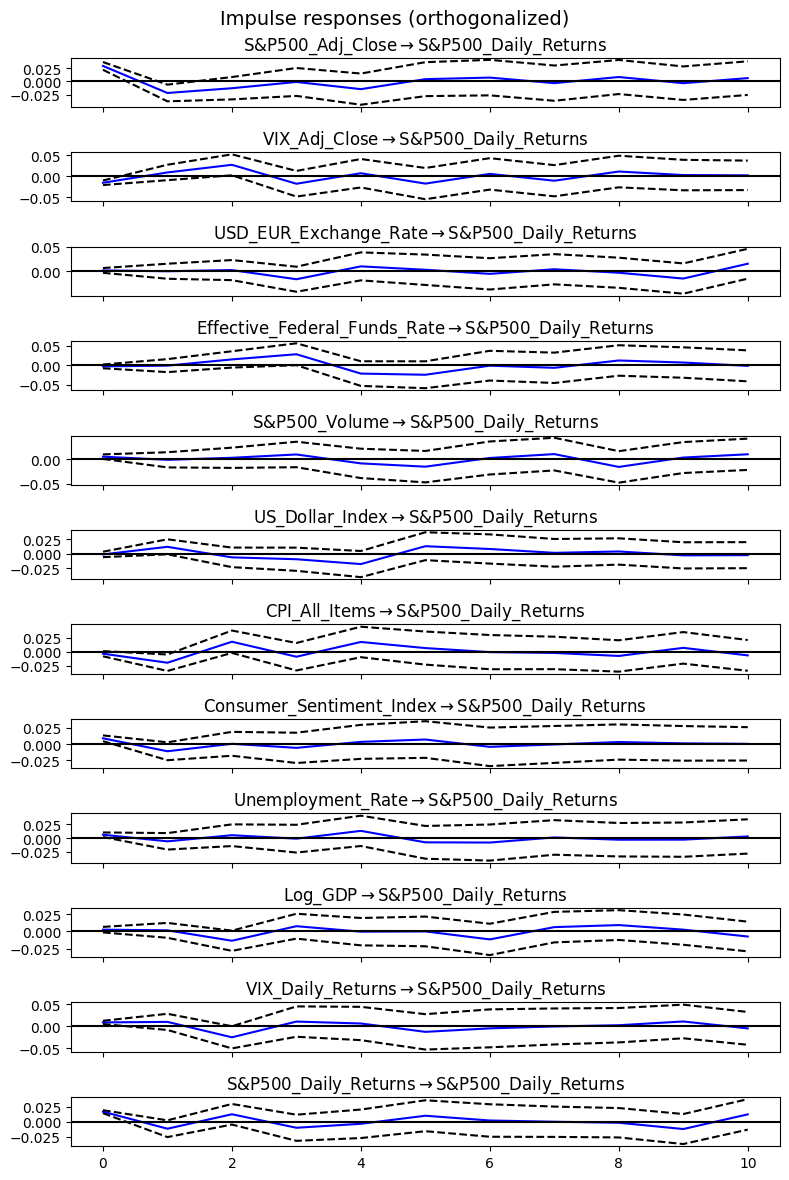

In [24]:
# Impulse response functions (IRF)
irf = var_model.irf(10)  # Forecast 10 periods
irf.plot(orth=True, response="S&P500_Daily_Returns", figsize=(8, 12)) 
plt.tight_layout()
plt.show()

In [25]:
# 5. Granger causality tests
def my_granger_tests(data, max_lag):
    for column in data.columns:
        if column != "S&P500_Adj_Close":
            print(f"Granger Causality Test: {column} -> S&P500_Adj_Close")
            grangercausalitytests(data[["S&P500_Adj_Close", column]], maxlag=max_lag)
            print()

In [26]:
my_granger_tests(df_diff, 4)

Granger Causality Test: VIX_Adj_Close -> S&P500_Adj_Close

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3836  , p=0.5373  , df_denom=88, df_num=1
ssr based chi2 test:   chi2=0.3967  , p=0.5288  , df=1
likelihood ratio test: chi2=0.3959  , p=0.5292  , df=1
parameter F test:         F=0.3836  , p=0.5373  , df_denom=88, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0536  , p=0.1346  , df_denom=85, df_num=2
ssr based chi2 test:   chi2=4.3488  , p=0.1137  , df=2
likelihood ratio test: chi2=4.2470  , p=0.1196  , df=2
parameter F test:         F=2.0536  , p=0.1346  , df_denom=85, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2730  , p=0.0252  , df_denom=82, df_num=3
ssr based chi2 test:   chi2=10.6571 , p=0.0137  , df=3
likelihood ratio test: chi2=10.0658 , p=0.0180  , df=3
parameter F test:         F=3.2730  , p=0.0252  , df_denom=82, df_num=3

Granger Causality
number of lags (no zero

In [27]:
# 6. Cointegration analysis
for column in columns_to_select:
    if column != "S&P500_Adj_Close":
        try:
            score, p_value, _ = coint(df["S&P500_Adj_Close"], df[column])
            print(f"Cointegration Test: {column}")
            print(f"t-statistic: {score}, p-value: {p_value}")
        except: 
            print(f"Error with {column} column.")

Cointegration Test: VIX_Adj_Close
t-statistic: 0.9329050820882765, p-value: 1.0
Cointegration Test: USD_EUR_Exchange_Rate
t-statistic: -0.44983845012404067, p-value: 0.9677169764998029
Cointegration Test: Effective_Federal_Funds_Rate
t-statistic: 0.3568354618599289, p-value: 0.9914894347573544
Cointegration Test: S&P500_Volume
t-statistic: 0.10835450526367843, p-value: 0.988124024101249
Cointegration Test: US_Dollar_Index
t-statistic: -0.9728435070428844, p-value: 0.9078777984501641
Cointegration Test: CPI_All_Items
t-statistic: -0.19510927867016628, p-value: 0.980179664372054
Cointegration Test: Consumer_Sentiment_Index
t-statistic: 0.4471074554485779, p-value: 0.9922738312560463
Cointegration Test: Unemployment_Rate
t-statistic: -0.4442003878183708, p-value: 0.9680750879894606
Cointegration Test: Log_GDP
t-statistic: -2.1984242221701575, p-value: 0.425176256972372
Cointegration Test: VIX_Daily_Returns
t-statistic: 0.28304513124015734, p-value: 0.9906952731974714
Error with S&P500_Dai

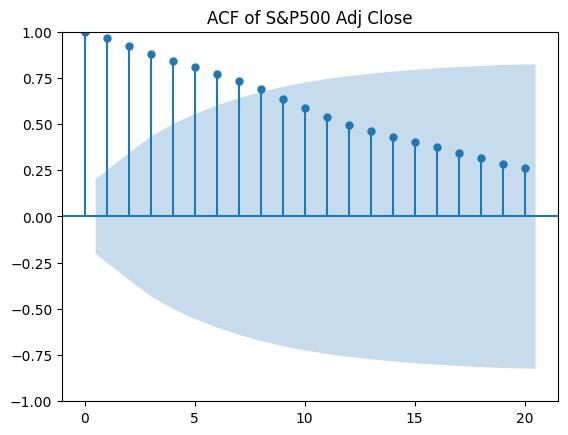

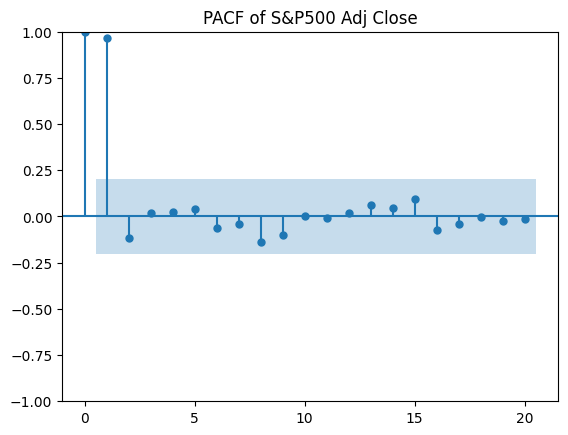

In [28]:
# Additional Visualizations: Autocorrelation
plot_acf(df["S&P500_Adj_Close"].dropna(), title="ACF of S&P500 Adj Close")
plot_pacf(df["S&P500_Adj_Close"].dropna(), title="PACF of S&P500 Adj Close")
plt.show()

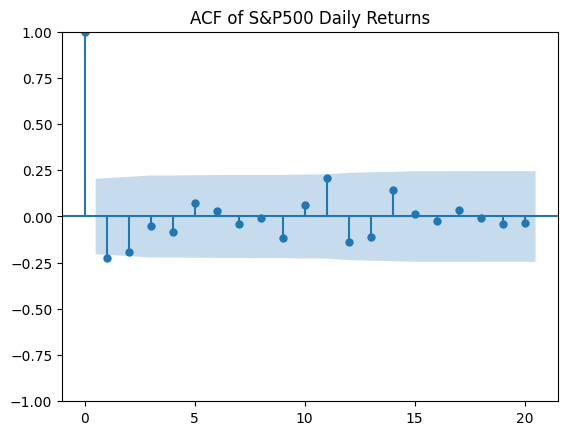

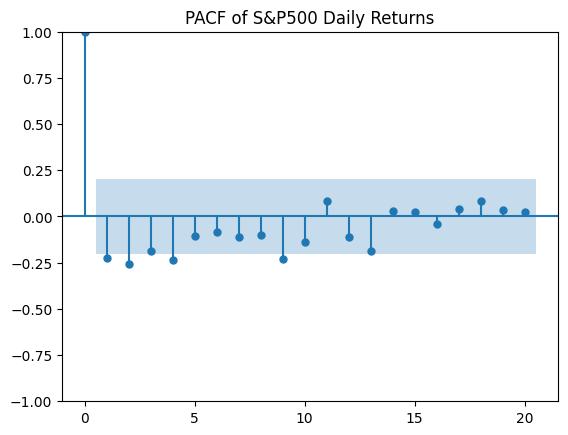

In [29]:
plot_acf(df_diff["S&P500_Daily_Returns"].dropna(), title="ACF of S&P500 Daily Returns")
plot_pacf(df_diff["S&P500_Daily_Returns"].dropna(), title="PACF of S&P500 Daily Returns")
plt.show()

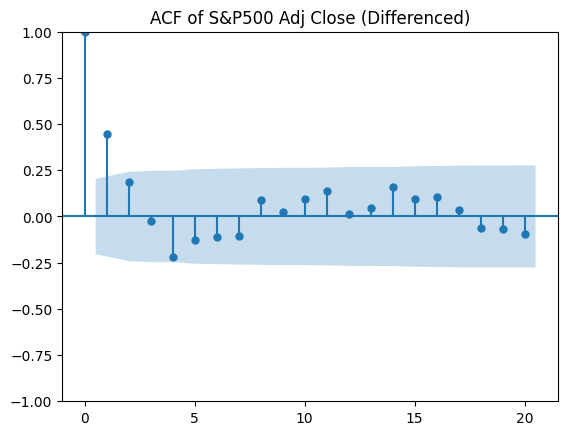

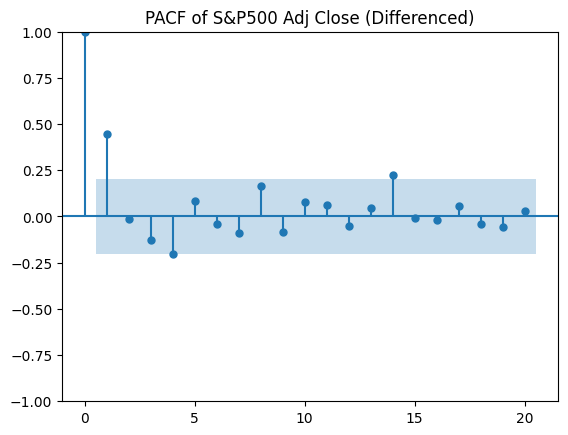

In [30]:
plot_acf(df_diff['S&P500_Adj_Close'].dropna(), title="ACF of S&P500 Adj Close (Differenced)")
plot_pacf(df_diff['S&P500_Adj_Close'].dropna(), title="PACF of S&P500 Adj Close (Differenced)")
plt.show()